In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finalenconder/Label_encoding.csv


In [29]:
!pip install imbalanced-learn

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing  import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [31]:
df = pd.read_csv("/kaggle/input/finalenconder/Label_encoding.csv")
df.shape


(101766, 50)

In [32]:
# Load the preprocessed dataset
df= pd.read_csv('/kaggle/input/finalenconder/Label_encoding.csv')

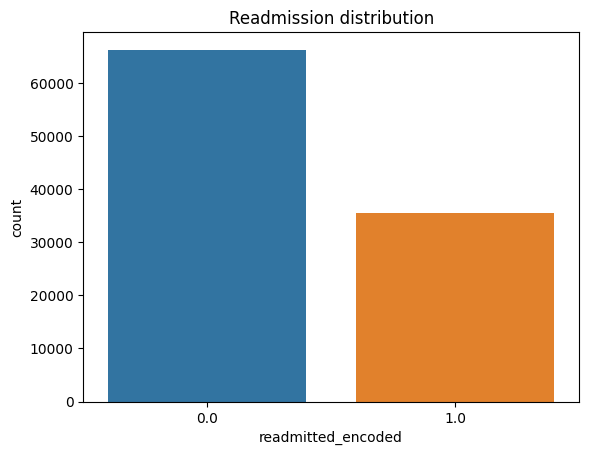

In [33]:
sns.countplot(x = "readmitted_encoded", data = df)
plt.title("Readmission distribution")
plt.show()

In [34]:
print(df.readmitted_encoded.value_counts())


readmitted_encoded
0.0    66221
1.0    35545
Name: count, dtype: int64


In [8]:
print(df.info())
print(df.describe())
print(df['readmitted_encoded'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   encounter_id                      101766 non-null  float64
 1   patient_nbr                       101766 non-null  float64
 2   admission_type_id                 101766 non-null  float64
 3   discharge_disposition_id          101766 non-null  float64
 4   admission_source_id               101766 non-null  float64
 5   time_in_hospital                  101766 non-null  float64
 6   num_lab_procedures                101766 non-null  float64
 7   num_procedures                    101766 non-null  float64
 8   num_medications                   101766 non-null  float64
 9   number_outpatient                 101766 non-null  float64
 10  number_emergency                  101766 non-null  float64
 11  number_inpatient                  101766 non-null  f

In [11]:
# target column
X = df.drop(columns=['readmitted_encoded'])
y = df['readmitted_encoded']

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Undersampling by random

In [12]:

from imblearn.under_sampling import RandomUnderSampler

def undersample(X, y):
    rus = RandomUnderSampler()
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled


In [13]:
X_train_undersampled, y_train_undersampled = undersample(X_train, y_train)

In [14]:
len(X_train_undersampled), len(y_train_undersampled)

(56856, 56856)

Oversampling by Smote

In [15]:
from imblearn.over_sampling import SMOTE

def oversample(X, y):
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

In [16]:
X_train_oversampled, y_train_oversampled = oversample(X_train, y_train)

In [17]:
len(X_train_oversampled), len(y_train_oversampled)

(105968, 105968)

Random Forest

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Original Dataset
rf_original = RandomForestClassifier(max_depth=10, random_state=42, class_weight="balanced")
rf_original.fit(X_train, y_train)

# Predictions on original test set
y_pred_original = rf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Original Dataset:")
print(f"Accuracy: {accuracy_original:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_original))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_original))

# Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

rf_oversampled = RandomForestClassifier(max_depth=10, random_state=42)
rf_oversampled.fit(X_train_over, y_train_over)

# Predictions on oversampled test set
y_pred_oversampled = rf_oversampled.predict(X_test)
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
print("\nOversampled Dataset:")
print(f"Accuracy: {accuracy_oversampled:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_oversampled))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_oversampled))

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

rf_undersampled = RandomForestClassifier(max_depth=10, random_state=42)
rf_undersampled.fit(X_train_under, y_train_under)

# Predictions on undersampled test set
y_pred_undersampled = rf_undersampled.predict(X_test)
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
print("\nUndersampled Dataset:")
print(f"Accuracy: {accuracy_undersampled:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_undersampled))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_undersampled))


Original Dataset:
Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.61      0.68     13237
         1.0       0.48      0.67      0.56      7117

    accuracy                           0.63     20354
   macro avg       0.62      0.64      0.62     20354
weighted avg       0.67      0.63      0.64     20354

Confusion Matrix:
[[8022 5215]
 [2380 4737]]

Oversampled Dataset:
Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.60      0.68     13237
         1.0       0.47      0.67      0.56      7117

    accuracy                           0.62     20354
   macro avg       0.62      0.64      0.62     20354
weighted avg       0.67      0.62      0.63     20354

Confusion Matrix:
[[7949 5288]
 [2347 4770]]

Undersampled Dataset:
Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78 

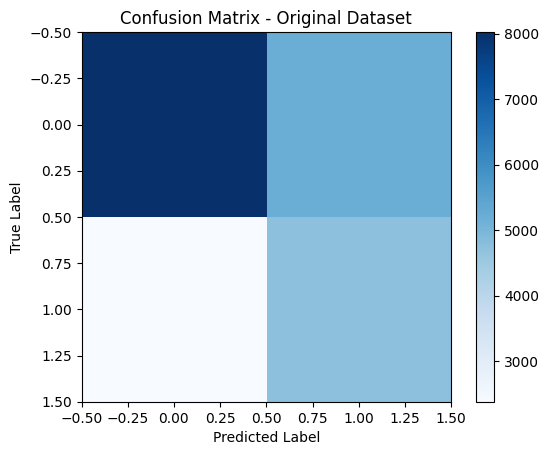

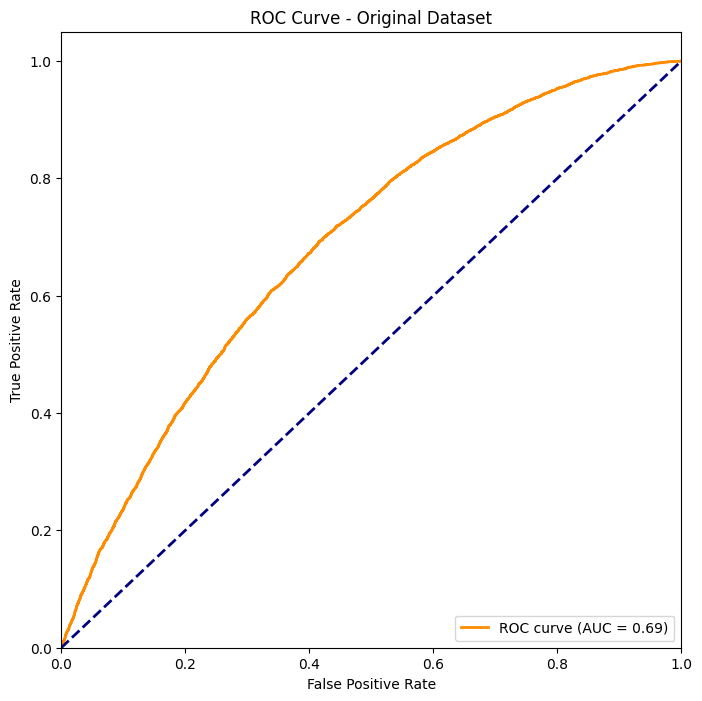

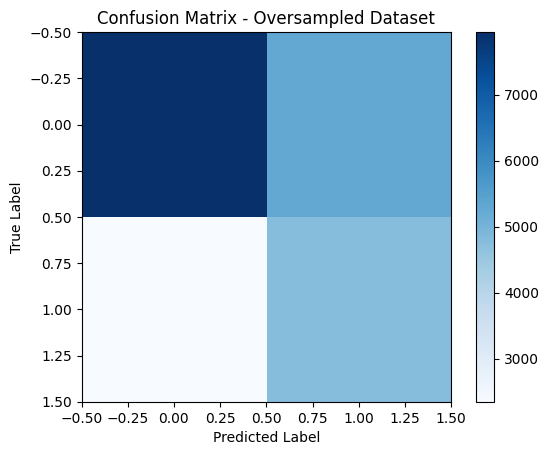

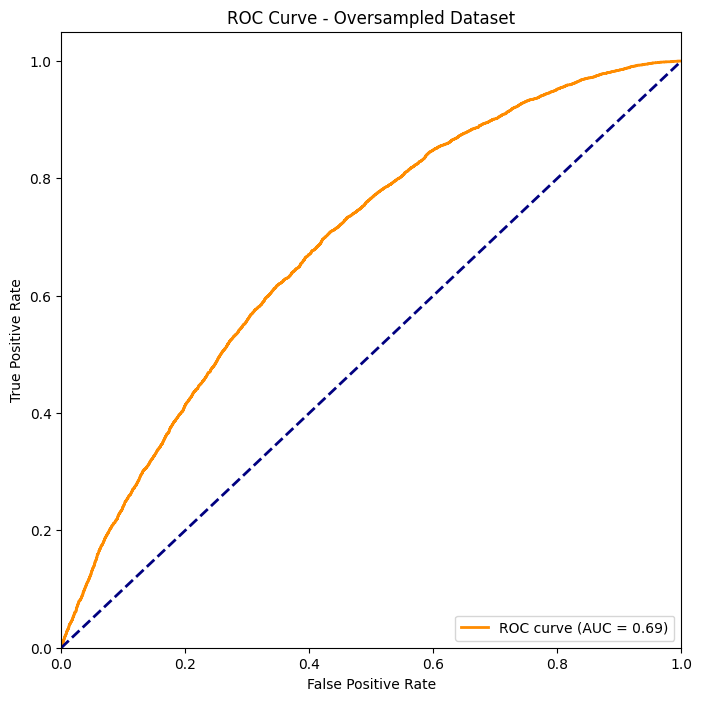

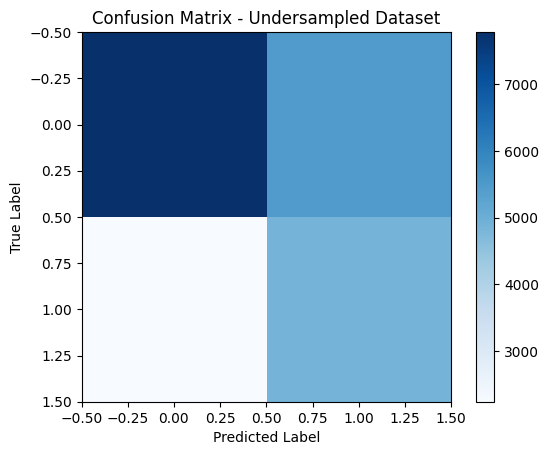

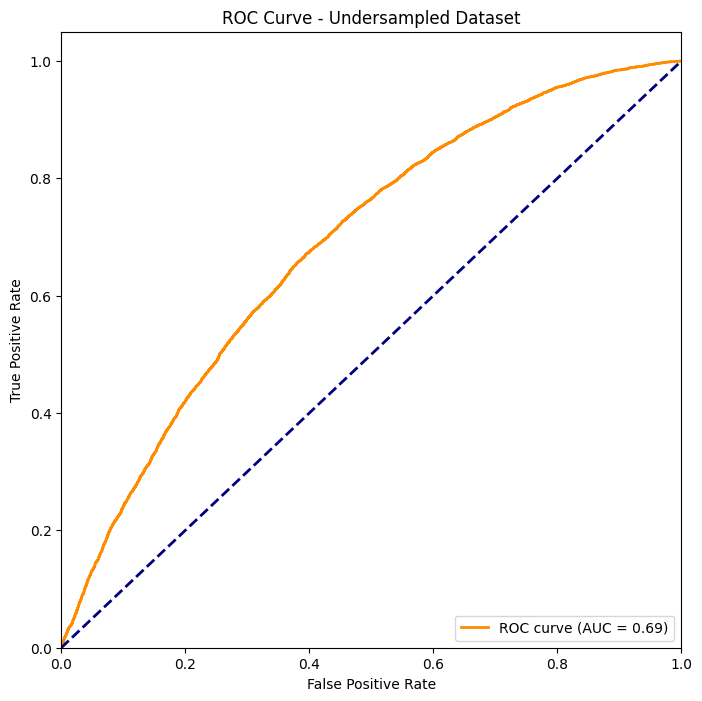

In [21]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# ROC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix and ROC for Original Dataset
plot_confusion_matrix(y_test, y_pred_original, 'Confusion Matrix - Original Dataset')
plot_roc_curve(y_test, rf_original.predict_proba(X_test)[:, 1], 'ROC Curve - Original Dataset')

# Confusion Matrix and ROC for Oversampled Dataset
plot_confusion_matrix(y_test, y_pred_oversampled, 'Confusion Matrix - Oversampled Dataset')
plot_roc_curve(y_test, rf_oversampled.predict_proba(X_test)[:, 1], 'ROC Curve - Oversampled Dataset')

# Confusion Matrix and ROC for Undersampled Dataset
plot_confusion_matrix(y_test, y_pred_undersampled, 'Confusion Matrix - Undersampled Dataset')
plot_roc_curve(y_test, rf_undersampled.predict_proba(X_test)[:, 1], 'ROC Curve - Undersampled Dataset')


Gated Recurrent Unit

In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Standardize your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X_train and X_test for GRU model
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build and compile the GRU model
model = Sequential([
    GRU(100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Original Dataset
print("Original Dataset:")
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on original test set
accuracy_gru_original = model.evaluate(X_test_reshaped, y_test)[1]
print("Accuracy (GRU) - Original Dataset:", accuracy_gru_original)

# Oversampling
print("\nOversampled Dataset:")
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train_scaled, y_train)
X_train_over_reshaped = np.reshape(X_train_over, (X_train_over.shape[0], 1, X_train_over.shape[1]))

model.fit(X_train_over_reshaped, y_train_over, epochs=10, batch_size=32)

# Evaluate the model on oversampled test set
accuracy_gru_oversampled = model.evaluate(X_test_reshaped, y_test)[1]
print("Accuracy (GRU) - Oversampled Dataset:", accuracy_gru_oversampled)

# Undersampling
print("\nUndersampled Dataset:")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)
X_train_under_reshaped = np.reshape(X_train_under, (X_train_under.shape[0], 1, X_train_under.shape[1]))

model.fit(X_train_under_reshaped, y_train_under, epochs=10, batch_size=32)

# Evaluate the model on undersampled test set
accuracy_gru_undersampled = model.evaluate(X_test_reshaped, y_test)[1]
print("Accuracy (GRU) - Undersampled Dataset:", accuracy_gru_undersampled)



Original Dataset:
Epoch 1/10
2545/2545 [==============================] - 14s 4ms/step - loss: 0.6201 - accuracy: 0.6577 - val_loss: 0.6172 - val_accuracy: 0.6594
Epoch 2/10
2545/2545 [==============================] - 10s 4ms/step - loss: 0.6103 - accuracy: 0.6657 - val_loss: 0.6132 - val_accuracy: 0.6623
Epoch 3/10
2545/2545 [==============================] - 10s 4ms/step - loss: 0.6069 - accuracy: 0.6681 - val_loss: 0.6113 - val_accuracy: 0.6626
Epoch 4/10
2545/2545 [==============================] - 10s 4ms/step - loss: 0.6041 - accuracy: 0.6700 - val_loss: 0.6104 - val_accuracy: 0.6633
Epoch 5/10
2545/2545 [==============================] - 10s 4ms/step - loss: 0.6018 - accuracy: 0.6727 - val_loss: 0.6096 - val_accuracy: 0.6634
Epoch 6/10
2545/2545 [==============================] - 10s 4ms/step - loss: 0.5997 - accuracy: 0.6751 - val_loss: 0.6101 - val_accuracy: 0.6652
Epoch 7/10
2545/2545 [==============================] - 10s 4ms/step - loss: 0.5977 - accuracy: 0.6751 - val_los

In [32]:
# Evaluate the model on original test set
y_pred_gru_original = (model.predict(X_test_reshaped) > 0.5).astype(int)
classification_report_gru_original = classification_report(y_test, y_pred_gru_original)
print("\nClassification Report (GRU) - Original Dataset:\n", classification_report_gru_original)

# Evaluate the model on oversampled test set
y_pred_gru_oversampled = (model.predict(X_test_reshaped) > 0.5).astype(int)
classification_report_gru_oversampled = classification_report(y_test, y_pred_gru_oversampled)
print("\nClassification Report (GRU) - Oversampled Dataset:\n", classification_report_gru_oversampled)

# Evaluate the model on undersampled test set
y_pred_gru_undersampled = (model.predict(X_test_reshaped) > 0.5).astype(int)
classification_report_gru_undersampled = classification_report(y_test, y_pred_gru_undersampled)
print("\nClassification Report (GRU) - Undersampled Dataset:\n", classification_report_gru_undersampled)



637/637 [==============================] - 1s 2ms/step

Classification Report (GRU) - Original Dataset:
               precision    recall  f1-score   support

         0.0       0.72      0.63      0.67     13237
         1.0       0.45      0.55      0.49      7117

    accuracy                           0.60     20354
   macro avg       0.59      0.59      0.58     20354
weighted avg       0.63      0.60      0.61     20354

637/637 [==============================] - 1s 2ms/step

Classification Report (GRU) - Oversampled Dataset:
               precision    recall  f1-score   support

         0.0       0.72      0.63      0.67     13237
         1.0       0.45      0.55      0.49      7117

    accuracy                           0.60     20354
   macro avg       0.59      0.59      0.58     20354
weighted avg       0.63      0.60      0.61     20354

637/637 [==============================] - 1s 2ms/step

Classification Report (GRU) - Undersampled Dataset:
               precision 

637/637 [==============================] - 1s 2ms/step


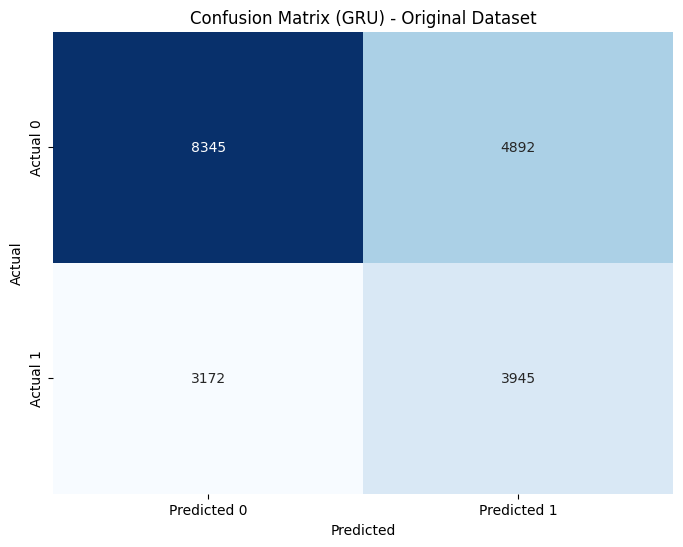

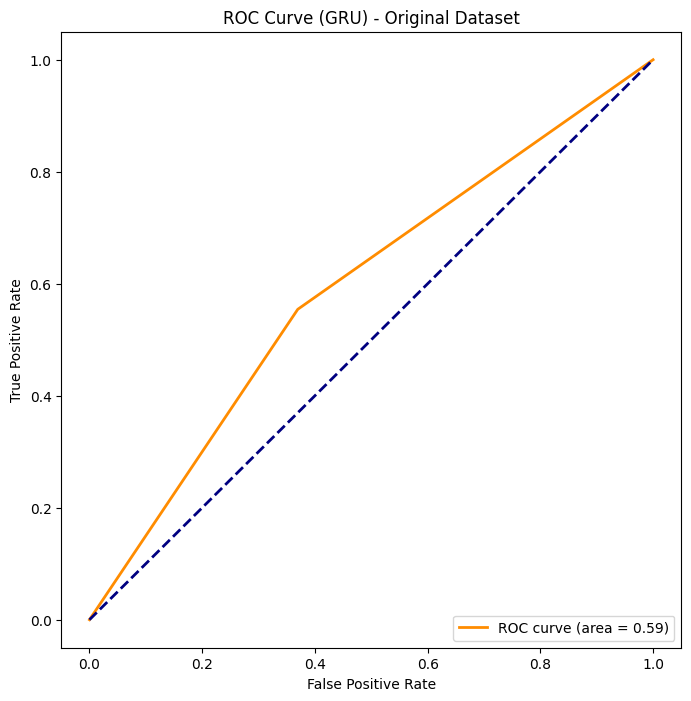

637/637 [==============================] - 1s 2ms/step


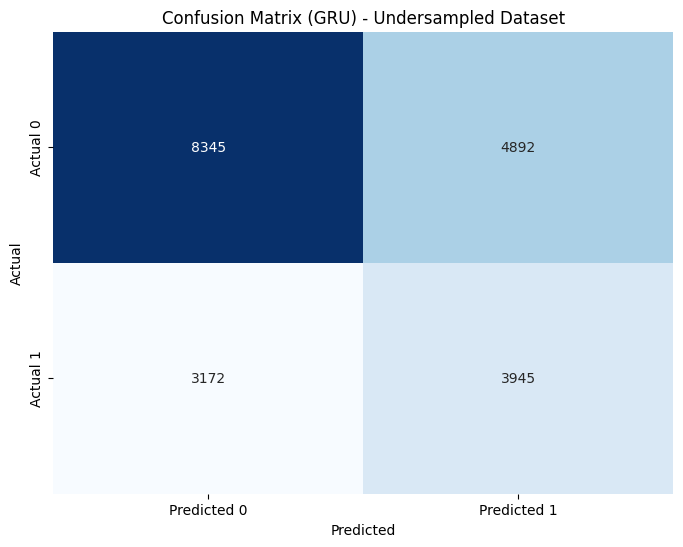

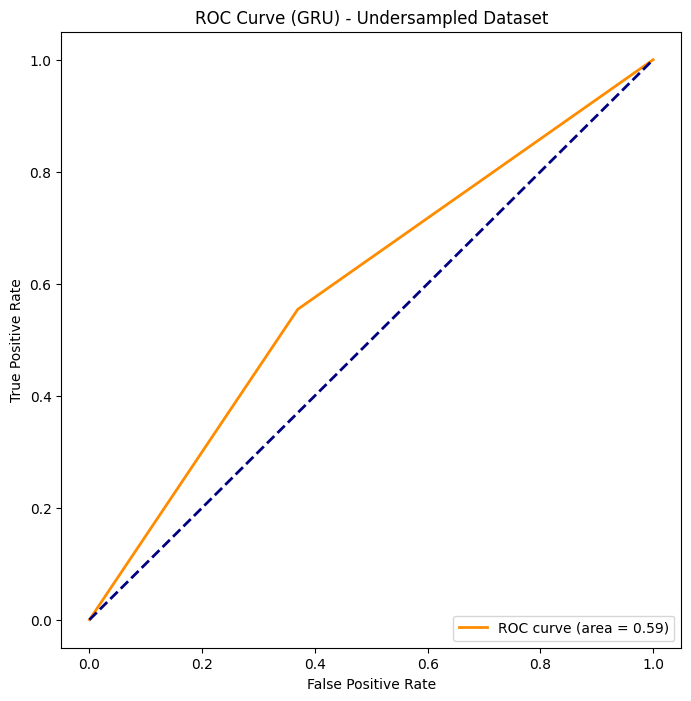

637/637 [==============================] - 1s 2ms/step


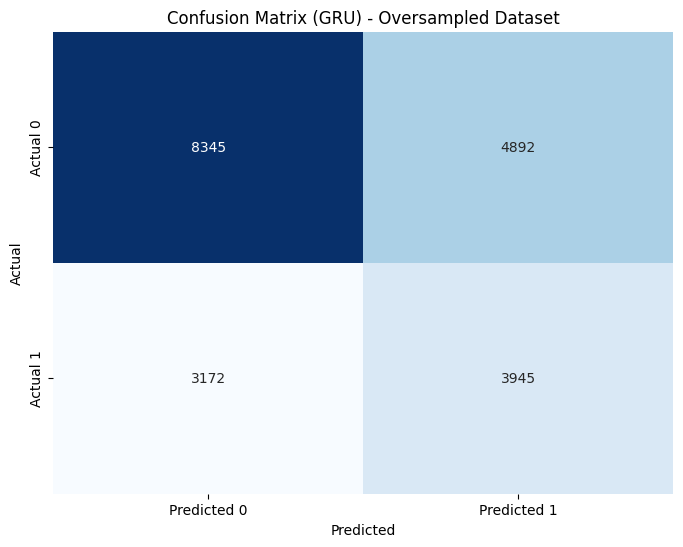

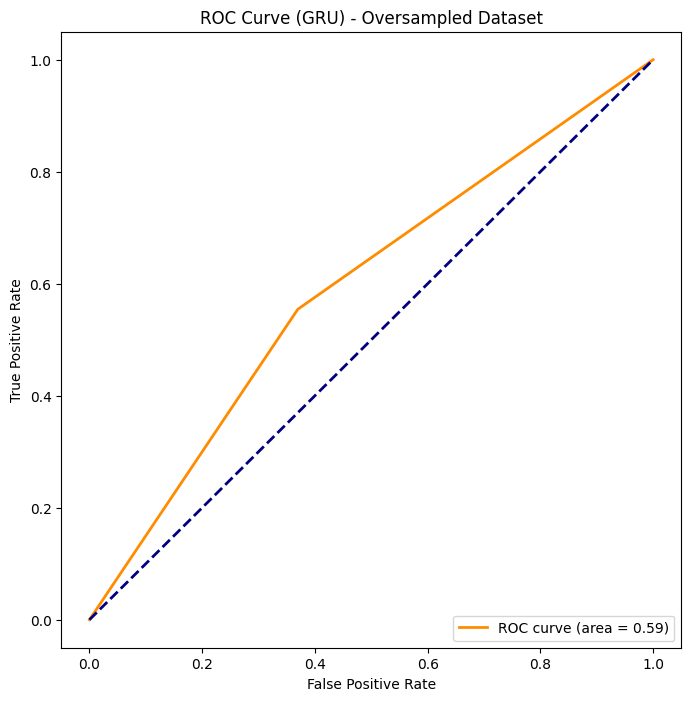

In [33]:
# Original Dataset
y_pred_gru_original = (model.predict(X_test_reshaped) > 0.5).astype(int)
conf_matrix_gru_original = confusion_matrix(y_test, y_pred_gru_original)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gru_original, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (GRU) - Original Dataset')
plt.show()

# ROC 
fpr_original, tpr_original, thresholds_original = roc_curve(y_test, y_pred_gru_original)
roc_auc_original = auc(fpr_original, tpr_original)
plt.figure(figsize=(8, 8))
plt.plot(fpr_original, tpr_original, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_original)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (GRU) - Original Dataset')
plt.legend(loc="lower right")
plt.show()

# Undersampling
y_pred_gru_undersampled = (model.predict(X_test_reshaped) > 0.5).astype(int)
conf_matrix_gru_undersampled = confusion_matrix(y_test, y_pred_gru_undersampled)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gru_undersampled, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (GRU) - Undersampled Dataset')
plt.show()

#ROC 
fpr_undersampled, tpr_undersampled, thresholds_undersampled = roc_curve(y_test, y_pred_gru_undersampled)
roc_auc_undersampled = auc(fpr_undersampled, tpr_undersampled)
plt.figure(figsize=(8, 8))
plt.plot(fpr_undersampled, tpr_undersampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_undersampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (GRU) - Undersampled Dataset')
plt.legend(loc="lower right")
plt.show()

# Oversampling
y_pred_gru_oversampled = (model.predict(X_test_reshaped) > 0.5).astype(int)
conf_matrix_gru_oversampled = confusion_matrix(y_test, y_pred_gru_oversampled)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gru_oversampled, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (GRU) - Oversampled Dataset')
plt.show()

# ROC
fpr_oversampled, tpr_oversampled, thresholds_oversampled = roc_curve(y_test, y_pred_gru_oversampled)
roc_auc_oversampled = auc(fpr_oversampled, tpr_oversampled)
plt.figure(figsize=(8, 8))
plt.plot(fpr_oversampled, tpr_oversampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_oversampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (GRU) - Oversampled Dataset')
plt.legend(loc="lower right")
plt.show()


Gradient Boosting 

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler




In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Instantiate the GradientBoostingClassifier models with desired hyperparameters
model_original = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_oversampled = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_undersampled = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the models with your training data (X_train, y_train), (X_train_oversampled, y_train_oversampled), (X_train_undersampled, y_train_undersampled)
model_original.fit(X_train, y_train)
model_oversampled.fit(X_train_oversampled, y_train_oversampled)
model_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Make predictions using each model
y_pred_original = model_original.predict(X_test)
y_pred_oversampled = model_oversampled.predict(X_test)
y_pred_undersampled = model_undersampled.predict(X_test)

# Evaluate accuracy for each dataset
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)

# Print the accuracies
print("Accuracy for Original Dataset (Gradient Boosting):", accuracy_original)
print("Accuracy for Oversampled Dataset (Gradient Boosting):", accuracy_oversampled)
print("Accuracy for Undersampled Dataset (Gradient Boosting):", accuracy_undersampled)


Accuracy for Original Dataset (Gradient Boosting): 0.6692542006485211
Accuracy for Oversampled Dataset (Gradient Boosting): 0.6623268153679867
Accuracy for Undersampled Dataset (Gradient Boosting): 0.6213520683895057


In [38]:
from sklearn.metrics import classification_report

# Make predictions using each model
y_pred_original = model_original.predict(X_test)
y_pred_oversampled = model_oversampled.predict(X_test)
y_pred_undersampled = model_undersampled.predict(X_test)

# Build classification reports
classification_report_original = classification_report(y_test, y_pred_original)
classification_report_oversampled = classification_report(y_test, y_pred_oversampled)
classification_report_undersampled = classification_report(y_test, y_pred_undersampled)

# Print classification reports
print("Classification Report for Original Dataset (Gradient Boosting):\n", classification_report_original)
print("\nClassification Report for Oversampled Dataset (Gradient Boosting):\n", classification_report_oversampled)
print("\nClassification Report for Undersampled Dataset (Gradient Boosting):\n", classification_report_undersampled)


Classification Report for Original Dataset (Gradient Boosting):
               precision    recall  f1-score   support

         0.0       0.68      0.91      0.78     13237
         1.0       0.57      0.22      0.32      7117

    accuracy                           0.67     20354
   macro avg       0.63      0.57      0.55     20354
weighted avg       0.64      0.67      0.62     20354


Classification Report for Oversampled Dataset (Gradient Boosting):
               precision    recall  f1-score   support

         0.0       0.70      0.85      0.77     13237
         1.0       0.53      0.32      0.40      7117

    accuracy                           0.66     20354
   macro avg       0.61      0.58      0.58     20354
weighted avg       0.64      0.66      0.64     20354


Classification Report for Undersampled Dataset (Gradient Boosting):
               precision    recall  f1-score   support

         0.0       0.78      0.58      0.67     13237
         1.0       0.47      0.69

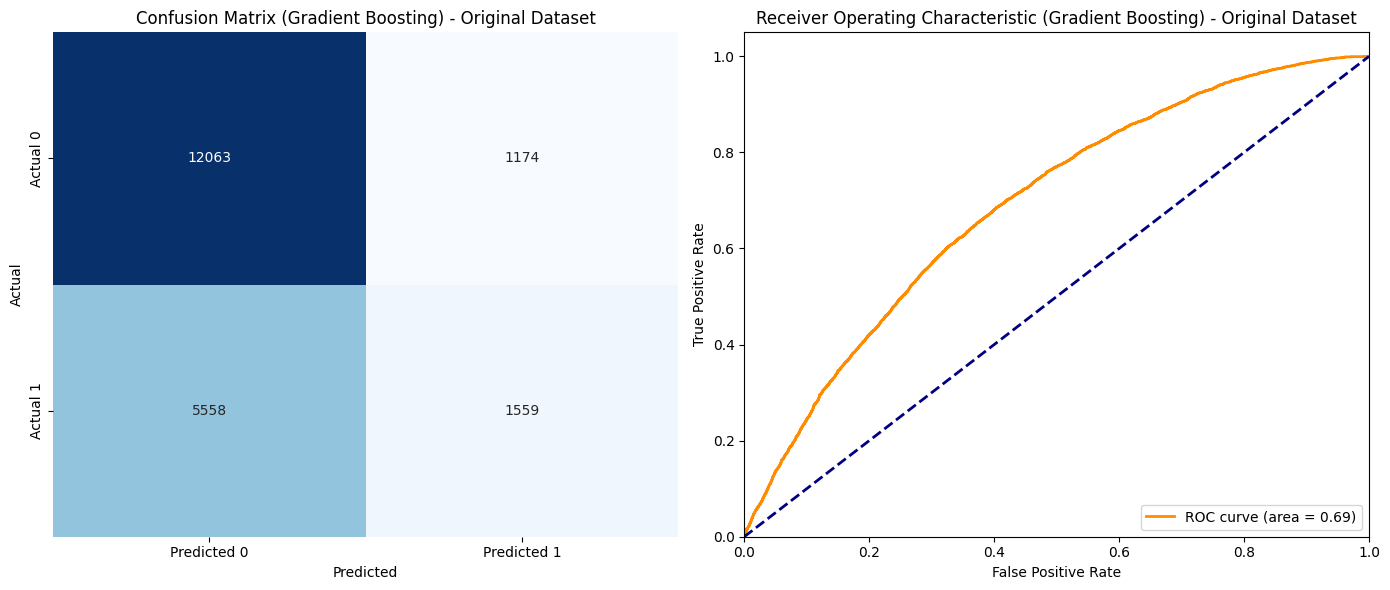

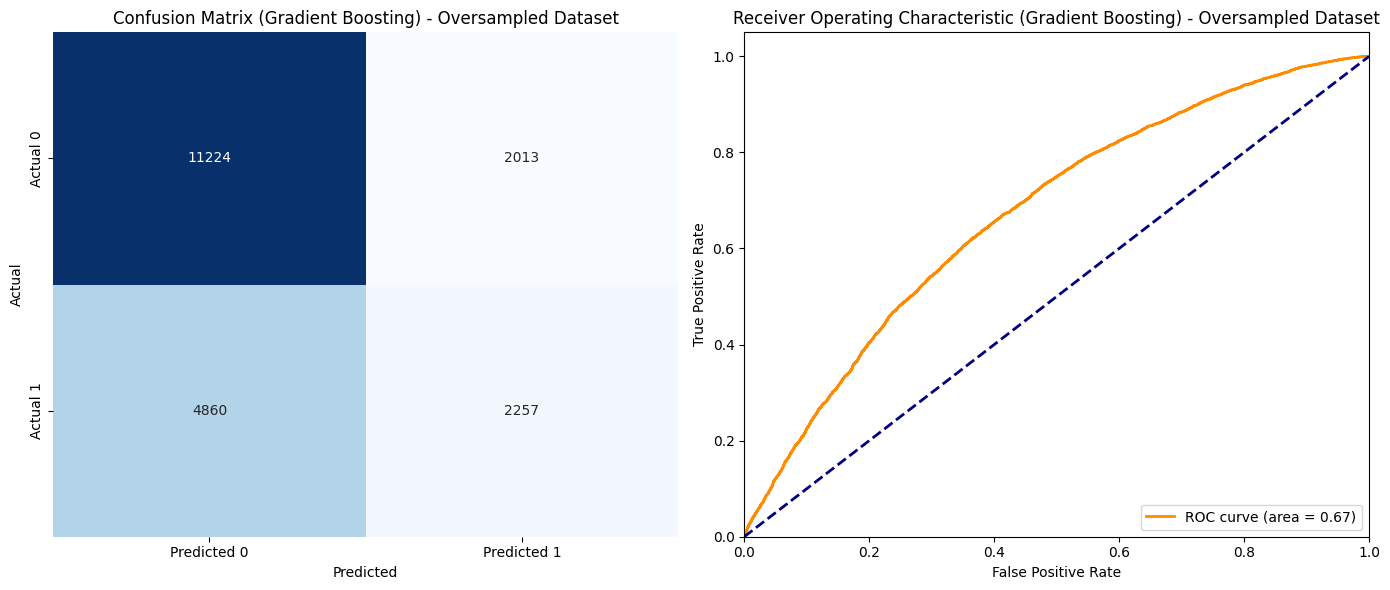

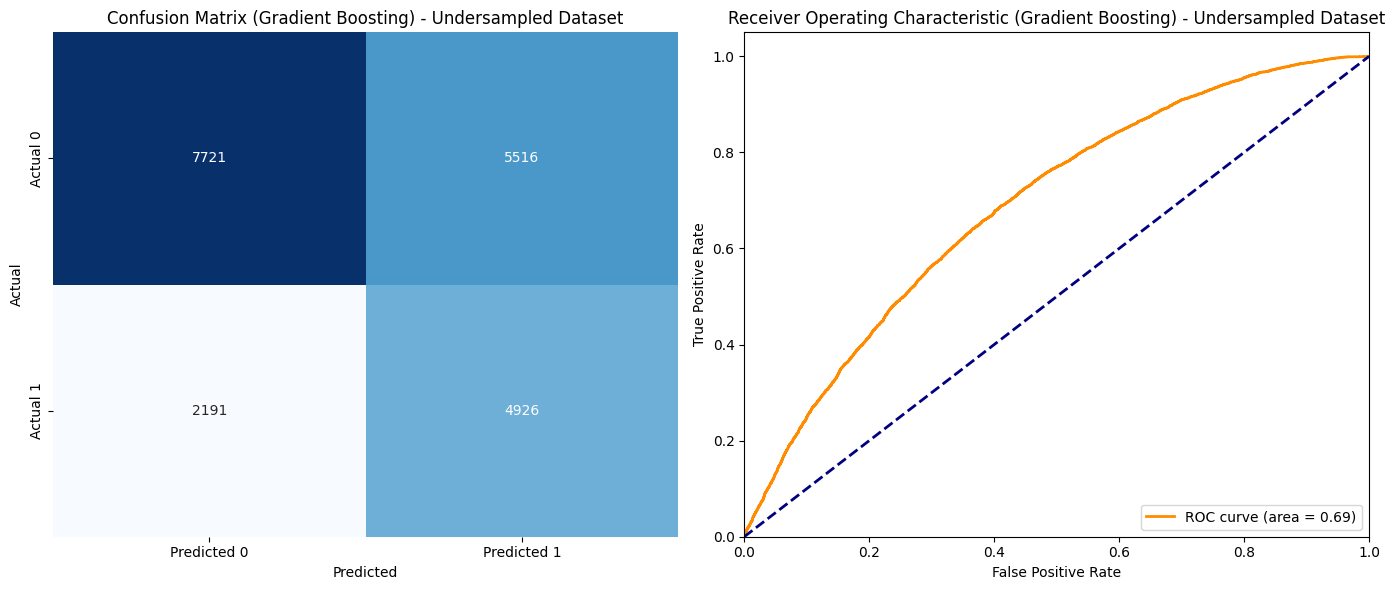

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the GradientBoostingClassifier models with desired hyperparameters
model_original = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_oversampled = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_undersampled = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the models with your training data (X_train, y_train), (X_train_oversampled, y_train_oversampled), (X_train_undersampled, y_train_undersampled)
model_original.fit(X_train, y_train)
model_oversampled.fit(X_train_oversampled, y_train_oversampled)
model_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Make predictions using each model
y_pred_prob_original = model_original.predict_proba(X_test)[:, 1]
y_pred_prob_oversampled = model_oversampled.predict_proba(X_test)[:, 1]
y_pred_prob_undersampled = model_undersampled.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC area
fpr_gb_original, tpr_gb_original, _ = roc_curve(y_test, y_pred_prob_original)
roc_auc_gb_original = auc(fpr_gb_original, tpr_gb_original)

fpr_gb_oversampled, tpr_gb_oversampled, _ = roc_curve(y_test, y_pred_prob_oversampled)
roc_auc_gb_oversampled = auc(fpr_gb_oversampled, tpr_gb_oversampled)

fpr_gb_undersampled, tpr_gb_undersampled, _ = roc_curve(y_test, y_pred_prob_undersampled)
roc_auc_gb_undersampled = auc(fpr_gb_undersampled, tpr_gb_undersampled)

# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for Original Dataset
y_pred_original = (y_pred_prob_original > 0.5).astype(int)  # Convert probabilities to binary predictions
conf_matrix_gb_original = confusion_matrix(y_test, y_pred_original)
sns.heatmap(conf_matrix_gb_original, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix (Gradient Boosting) - Original Dataset')

# ROC Curve for Original Dataset
ax2.plot(fpr_gb_original, tpr_gb_original, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb_original)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (Gradient Boosting) - Original Dataset')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Plot confusion matrix and ROC curve for oversampled dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for Oversampled Dataset
y_pred_oversampled = (y_pred_prob_oversampled > 0.5).astype(int)  # Convert probabilities to binary predictions
conf_matrix_gb_oversampled = confusion_matrix(y_test, y_pred_oversampled)
sns.heatmap(conf_matrix_gb_oversampled, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix (Gradient Boosting) - Oversampled Dataset')

# ROC Curve for Oversampled Dataset
ax2.plot(fpr_gb_oversampled, tpr_gb_oversampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb_oversampled)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (Gradient Boosting) - Oversampled Dataset')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Plot confusion matrix and ROC curve for undersampled dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for Undersampled Dataset
y_pred_undersampled = (y_pred_prob_undersampled > 0.5).astype(int)  # Convert probabilities to binary predictions
conf_matrix_gb_undersampled = confusion_matrix(y_test, y_pred_undersampled)
sns.heatmap(conf_matrix_gb_undersampled, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix (Gradient Boosting) - Undersampled Dataset')

# ROC Curve for Undersampled Dataset
ax2.plot(fpr_gb_undersampled, tpr_gb_undersampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb_undersampled)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (Gradient Boosting) - Undersampled Dataset')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()



MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Original Dataset
mlp_model_original = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
mlp_model_original.fit(X_train, y_train)
y_pred_mlp_original = mlp_model_original.predict(X_test)

# Evaluate the model on original dataset
accuracy_mlp_original = accuracy_score(y_test, y_pred_mlp_original)
precision_mlp_original = precision_score(y_test, y_pred_mlp_original)
recall_mlp_original = recall_score(y_test, y_pred_mlp_original)
f1_mlp_original = f1_score(y_test, y_pred_mlp_original)
conf_matrix_mlp_original = confusion_matrix(y_test, y_pred_mlp_original)
classification_report_mlp_original = classification_report(y_test, y_pred_mlp_original)

# Print evaluation metrics for original dataset
print("Original Dataset (MLP):")
print("Accuracy:", accuracy_mlp_original)
print("Precision:", precision_mlp_original)
print("Recall:", recall_mlp_original)
print("F1-score:", f1_mlp_original)
print("Confusion Matrix:")
print(conf_matrix_mlp_original)
print("\nClassification Report:")
print(classification_report_mlp_original)

# Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

mlp_model_oversampled = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
mlp_model_oversampled.fit(X_train_over, y_train_over)

# Predictions on oversampled test set
y_pred_mlp_oversampled = mlp_model_oversampled.predict(X_test)

# Evaluate the model on oversampled dataset
accuracy_mlp_oversampled = accuracy_score(y_test, y_pred_mlp_oversampled)
precision_mlp_oversampled = precision_score(y_test, y_pred_mlp_oversampled)
recall_mlp_oversampled = recall_score(y_test, y_pred_mlp_oversampled)
f1_mlp_oversampled = f1_score(y_test, y_pred_mlp_oversampled)
conf_matrix_mlp_oversampled = confusion_matrix(y_test, y_pred_mlp_oversampled)
classification_report_mlp_oversampled = classification_report(y_test, y_pred_mlp_oversampled)

# Print evaluation metrics for oversampled dataset
print("\nOversampled Dataset (MLP):")
print("Accuracy:", accuracy_mlp_oversampled)
print("Precision:", precision_mlp_oversampled)
print("Recall:", recall_mlp_oversampled)
print("F1-score:", f1_mlp_oversampled)
print("Confusion Matrix:")
print(conf_matrix_mlp_oversampled)
print("\nClassification Report:")
print(classification_report_mlp_oversampled)

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

mlp_model_undersampled = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
mlp_model_undersampled.fit(X_train_under, y_train_under)

# Predictions on undersampled test set
y_pred_mlp_undersampled = mlp_model_undersampled.predict(X_test)

# Evaluate the model on undersampled dataset
accuracy_mlp_undersampled = accuracy_score(y_test, y_pred_mlp_undersampled)
precision_mlp_undersampled = precision_score(y_test, y_pred_mlp_undersampled)
recall_mlp_undersampled = recall_score(y_test, y_pred_mlp_undersampled)
f1_mlp_undersampled = f1_score(y_test, y_pred_mlp_undersampled)
conf_matrix_mlp_undersampled = confusion_matrix(y_test, y_pred_mlp_undersampled)
classification_report_mlp_undersampled = classification_report(y_test, y_pred_mlp_undersampled)

# Print evaluation metrics for undersampled dataset
print("\nUndersampled Dataset (MLP):")
print("Accuracy:", accuracy_mlp_undersampled)
print("Precision:", precision_mlp_undersampled)
print("Recall:", recall_mlp_undersampled)
print("F1-score:", f1_mlp_undersampled)
print("Confusion Matrix:")
print(conf_matrix_mlp_undersampled)
print("\nClassification Report:")
print(classification_report_mlp_undersampled)


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate ROC curve and ROC area for original dataset
y_pred_prob_mlp_original = mlp_model_original.predict_proba(X_test)[:, 1]
fpr_mlp_original, tpr_mlp_original, _ = roc_curve(y_test, y_pred_prob_mlp_original)
roc_auc_mlp_original = auc(fpr_mlp_original, tpr_mlp_original)

# Plot confusion matrix and ROC curve for original dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
sns.heatmap(conf_matrix_mlp_original, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix - Original Dataset')

# ROC Curve
ax2.plot(fpr_mlp_original, tpr_mlp_original, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp_original)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - Original Dataset')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Calculate ROC curve and ROC area for oversampled dataset
y_pred_prob_mlp_oversampled = mlp_model_oversampled.predict_proba(X_test)[:, 1]
fpr_mlp_oversampled, tpr_mlp_oversampled, _ = roc_curve(y_test, y_pred_prob_mlp_oversampled)
roc_auc_mlp_oversampled = auc(fpr_mlp_oversampled, tpr_mlp_oversampled)

# Plot confusion matrix and ROC curve for oversampled dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
sns.heatmap(conf_matrix_mlp_oversampled, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix - Oversampled Dataset')

# ROC Curve
ax2.plot(fpr_mlp_oversampled, tpr_mlp_oversampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp_oversampled)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - Oversampled Dataset')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Calculate ROC curve and ROC area for undersampled dataset
y_pred_prob_mlp_undersampled = mlp_model_undersampled.predict_proba(X_test)[:, 1]
fpr_mlp_undersampled, tpr_mlp_undersampled, _ = roc_curve(y_test, y_pred_prob_mlp_undersampled)
roc_auc_mlp_undersampled = auc(fpr_mlp_undersampled, tpr_mlp_undersampled)

# Plot confusion matrix and ROC curve for undersampled dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
sns.heatmap(conf_matrix_mlp_undersampled, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix - Undersampled Dataset')

# ROC Curve
ax2.plot(fpr_mlp_undersampled, tpr_mlp_undersampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp_undersampled)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - Undersampled Dataset')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
classification_report_logistic = classification_report(y_test, y_pred_logistic)

# Print the classification report
print("Classification Report (Logistic Regression):\n", classification_report_logistic)


In [ ]:

# Create a confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_probs_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_logistic)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
